In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.3.0'

In [75]:
df=pd.read_csv('data.csv',skiprows=23)

In [76]:
df.rename(columns={'Unnamed: 0':'qlt_assesment', 'Unnamed: 1':'ret_abn' }, inplace=True)
df.rename(columns={'Unnamed: 2':'MA_5', 'Unnamed: 3':'MA_6', 'Unnamed: 4':'MA_7', 'Unnamed: 5':'MA_8', 'Unnamed: 6':'MA_9', 'Unnamed: 7':'MA_10'}, inplace=True)
df.rename(columns={'Unnamed: 8':'exudates1', 'Unnamed: 9':'exudates2', 'Unnamed: 10':'exudates3', 'Unnamed: 11':'exudates4', 'Unnamed: 12':'exudates5', 'Unnamed: 13':'exudates6', 'Unnamed: 14':'exudates7', 'Unnamed: 15':'exudates8'}, inplace=True)
df.rename(columns={'Unnamed: 16':'euc_dis', 'Unnamed: 17':'dia_opd', 'Unnamed: 18':'AMorFM', 'Unnamed: 19':'DR'}, inplace=True)
df=df.astype(float)

In [77]:
df = df[(df.qlt_assesment==1)]
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,qlt_assesment,ret_abn,MA_5,MA_6,MA_7,MA_8,MA_9,MA_10,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,exudates8,euc_dis,dia_opd,AMorFM,DR
0,1.0,1.0,49.0,48.0,48.0,48.0,47.0,43.0,45.664014,31.845974,6.041499,0.347320,0.000000,0.000000,0.000000,0.00000,0.495989,0.116812,0.0,0.0
1,1.0,1.0,35.0,33.0,29.0,28.0,23.0,16.0,136.667753,22.767191,9.801757,2.721685,1.144461,0.790663,0.434813,0.32611,0.572963,0.083066,1.0,1.0
2,1.0,1.0,59.0,59.0,58.0,58.0,50.0,34.0,43.432426,16.415454,5.927630,1.854915,0.163532,0.004672,0.000000,0.00000,0.540783,0.126153,0.0,0.0
3,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,106.527790,43.600820,20.391427,2.180248,0.051763,0.000000,0.000000,0.00000,0.550975,0.102490,0.0,0.0
4,1.0,1.0,62.0,62.0,62.0,57.0,52.0,38.0,55.050124,22.778672,10.414514,2.426668,0.169267,0.029237,0.000000,0.00000,0.494945,0.104638,0.0,0.0


In [78]:
# df = df[~(df['MA_5'] >=80)]
# df = df[~(df['MA_6'] >=80)]
# df = df[~(df['MA_7'] >=80)]
# df = df[~(df['MA_8'] >=80)]
# df = df[~(df['MA_9'] >=80)]
# df = df[~(df['MA_10'] >=50)]

In [79]:
# df = df[~(df['exudates1'] >=250)]
# df = df[~(df['exudates2'] >=100)]
# df = df[~(df['exudates3'] >=75)]
# df = df[~(df['exudates4'] >=25)]
# df = df[~(df['exudates5'] >=25)]
# df = df[~(df['exudates6'] >=0.01)]
# df = df[~(df['exudates7'] >=0.1)]
# df = df[~(df['exudates8'] >=0.1)]

In [80]:
x=df[['MA_5', 'MA_6', 'MA_7', 'MA_8', 'MA_9','MA_10', 'exudates1','exudates3', 'exudates4',
       'exudates5', 'exudates6', 'exudates7', 'exudates8','euc_dis','dia_opd']]
y=df[['DR']]
x=np.array(x)
y=np.array(y)

In [81]:
x.shape

(1147, 15)

In [82]:
train_index = int(len(df)*0.75)
x_train, x_test = x[:train_index], x[train_index:]
y_train,y_test = y[:train_index],y[train_index:]

In [83]:
x_train.shape 

(860, 15)

In [84]:
y_test.shape

(287, 1)

In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [86]:
from keras.constraints import maxnorm
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD

In [87]:
def build_model():
  model = Sequential()
  model.add(Dense(units=860,input_dim=15, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(units=430, activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
  model.add(Dropout(0.4))
  model.add(Dense(units=215,activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(units=54,activation='relu'))
  model.add(Dense(units=9,activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  sgd = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [88]:
model = build_model()
history = model.fit(x_test,y_test, validation_data=(x_test, y_test), epochs=300, batch_size=32, verbose=1)
print(history.history.keys())

Epoch 1/300
9/9 [==============================] - 0s 22ms/step - loss: 122.6310 - accuracy: 0.4878 - val_loss: 114.2260 - val_accuracy: 0.5679
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 104.6476 - accuracy: 0.5540 - val_loss: 91.9005 - val_accuracy: 0.5645
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 81.5156 - accuracy: 0.5679 - val_loss: 68.6961 - val_accuracy: 0.5645
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 59.2199 - accuracy: 0.5645 - val_loss: 47.8888 - val_accuracy: 0.5645
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 39.9324 - accuracy: 0.5645 - val_loss: 30.6682 - val_accuracy: 0.5645
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 24.4899 - accuracy: 0.5645 - val_loss: 17.5021 - val_accuracy: 0.5645
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 13.1885 - accuracy: 0.5645 - val_loss: 8.5585 - val_accuracy: 0.5645
Epoch 8/30

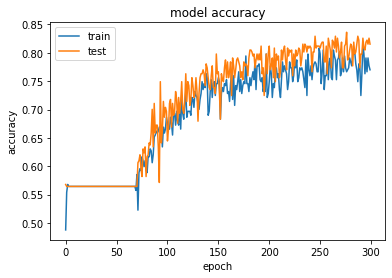

In [89]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

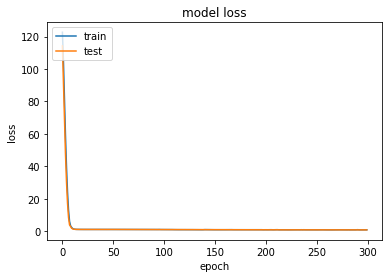

In [91]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
print(f"Validation Accuracy : {np.mean(history.history['val_accuracy'])}")
print(f"Training Accuracy : {np.mean(history.history['accuracy'])}")
print(f"Validation Loss : {np.mean(history.history['val_loss'])}")
print(f"Validation Loss : {np.mean(history.history['loss'])}")

Validation Accuracy : 0.7138792061805725
Training Accuracy : 0.6936469217141469
Validation Loss : 2.2564922833442687
Validation Loss : 2.5137545130650203


In [93]:
from keras.models import model_from_json
import os

In [94]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [95]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("model.h5")

In [96]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 860)               13760     
_________________________________________________________________
dense_19 (Dense)             (None, 430)               370230    
_________________________________________________________________
dropout_3 (Dropout)          (None, 430)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 215)               92665     
_________________________________________________________________
dense_21 (Dense)             (None, 54)                11664     
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 495       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

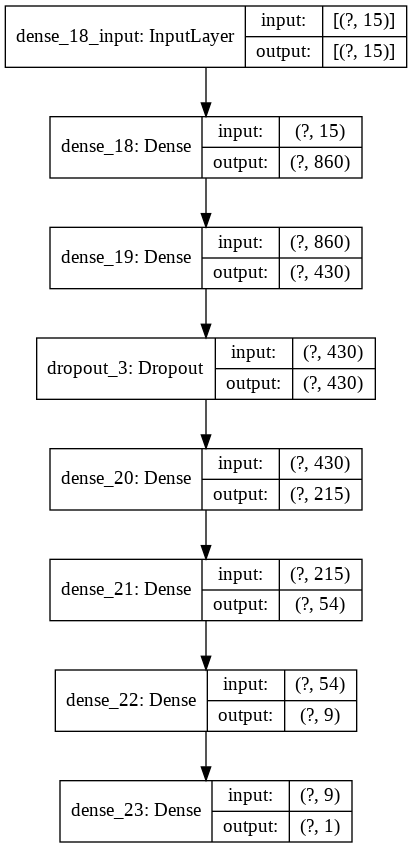

In [97]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)